In [123]:
# import json
# # Utility function: saves data in JSON format
# def dump_json(out_file_name, result):
#  with open(out_file_name, 'w') as out_file:
#     out_file.write(json.dumps(result, indent=4, separators=(',', ': ')))
# # Utility function: loads JSON data into a Python object
# def load_json(file_name):
#  with open(file_name) as f:
#     return json.loads(f.read())
# path = 'betwenness_centrality.txt' # Example
# dump_json(path, bet_cen)
# saved_centrality = load_json(path) 


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pygraphviz

import matplotlib as mpl

In [3]:
df=pd.read_csv(r'/Users/paul_reitz/Downloads/BIS-data-for-research-cleaned.xlsx - Worksheet.csv')

In [4]:
graphType= nx.DiGraph()
G_BIS=nx.from_pandas_edgelist(df,source="Reporting_country",target="Counterparty_country", edge_attr='Average_2021', create_using= graphType)

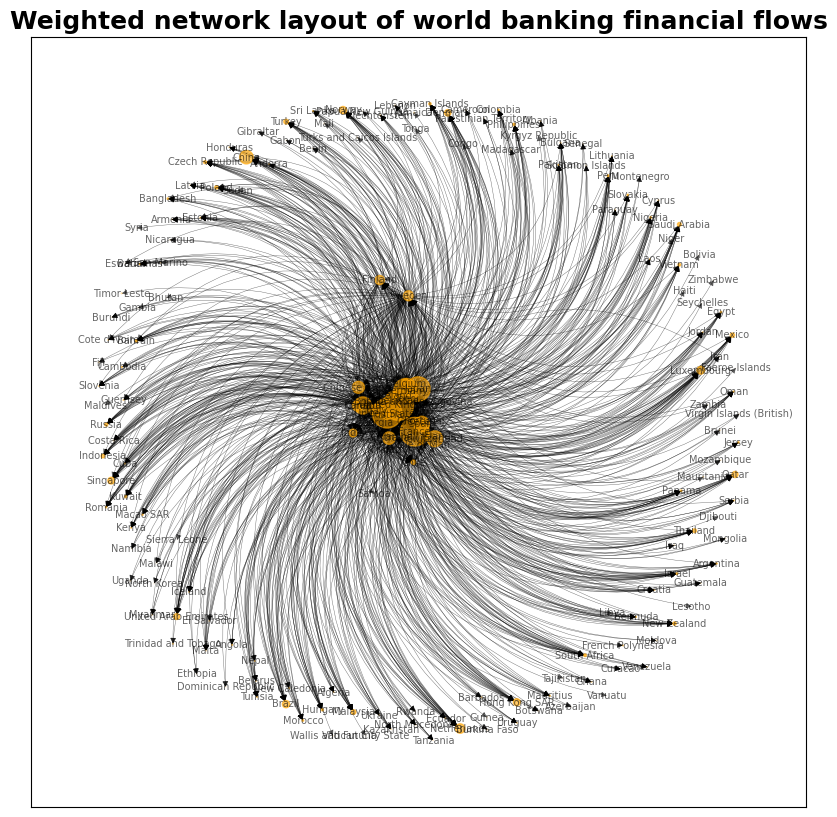

In [5]:
colors = range(10)
options= {'node_color': 'orange',
# 'node_size' : 60,
# "edge_color": colors,
'width':0.3,
'arrowstyle': '-|>',
"edge_cmap": plt.cm.Blues,
'arrowsize':8.6}


degrees = G_BIS.degree(weight='Average_2021')
node_weight=[ v for u,v in degrees]
node_label=[u for u,v in degrees]



edges,weights1 = zip(*nx.get_edge_attributes(G_BIS,'Average_2021').items())
# print(weights1)

div=max(weights1)

weights1 = tuple(elem/div for elem in weights1)

plt.figure(figsize=(10,10))
plt.title('Weighted network layout of world banking financial flows', fontsize=18, weight='bold')
pos =nx.spring_layout(G_BIS, weight="Average_2021")
nx.draw_networkx(G_BIS,pos=pos,with_labels=True ,  alpha=0.6, font_size= 7,arrows=True, node_size=[v * 0.0005 for v in node_weight], font_color='black',connectionstyle="arc3,rad=0.4", **options)


In [8]:
# %pip install pygraphviz

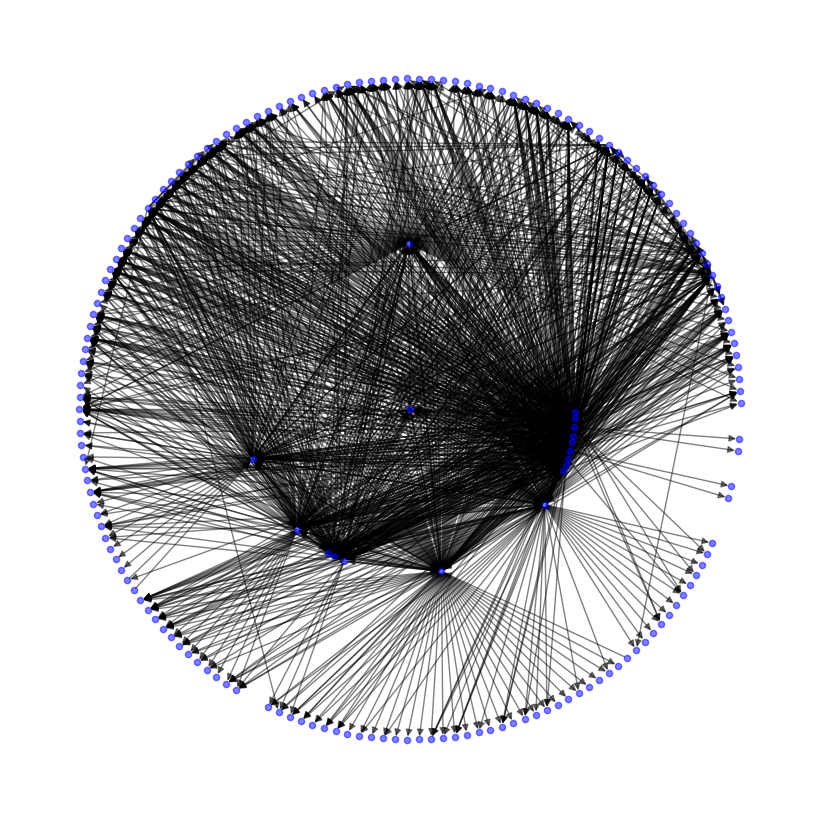

In [7]:
G = G_BIS
pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", args="")
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
plt.axis("equal")
plt.show()

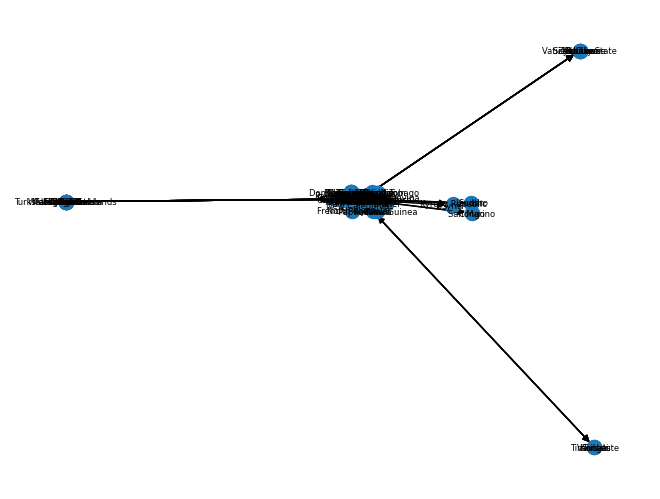

In [10]:
nx.draw_spectral(G_BIS, with_labels=True , font_size= 6, node_size=100)

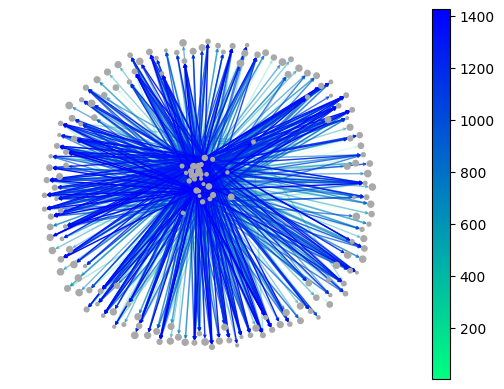

<Figure size 10000x10000 with 0 Axes>

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

seed = 13648  # Seed random number generators for reproducibility
G = G_BIS
pos = nx.spring_layout(G, seed=seed, weight="Average_2021")

node_sizes = [3 + 0.10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.winter_r

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="darkgrey")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=4,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=1,
)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)

ax = plt.gca()
ax.set_axis_off()
plt.colorbar(pc, ax=ax)
plt.figure(figsize=(100,100))
plt.show()

In [10]:
nx.info(G_BIS)

/var/folders/0t/4q2l76sj2v91nwcfqht0bwlw0000gn/T/ipykernel_76057/2577022701.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G_BIS)


'DiGraph with 182 nodes and 1424 edges'

In [53]:
kt=dict(nx.katz_centrality(G_BIS,max_iter=1000,tol=1.0e-0)).values()

ans=sum(kt)/len(kt)
print(ans)

0.06954402562144855


In [12]:
nx.average_clustering(G_BIS)

0.7447543547957605

In [13]:
p=(nx.number_of_edges(G_BIS)/(nx.number_of_edges(nx.complete_graph(n=182))))

print(p)


0.08645498148260579


In [14]:
max(nx.core_number(G_BIS).values()) #degeneracy

29

In [15]:
nx.constraint(G_BIS)

{'Austria': 0.07140350806057504,
 'United Arab Emirates': nan,
 'Albania': nan,
 'Armenia': nan,
 'Australia': 0.07177239957854793,
 'Azerbaijan': nan,
 'Bosnia and Herzegovina': 0.27512304434020796,
 'Bangladesh': nan,
 'Belgium': 0.07412917194116535,
 'Bulgaria': nan,
 'Bahrain': nan,
 'Burundi': nan,
 'Brazil': nan,
 'Bahamas': nan,
 'Belarus': nan,
 'Canada': 0.08725174275431163,
 'Switzerland': 0.1031082215427239,
 "Cote d'Ivoire": nan,
 'Chile': 0.09734381801164525,
 'China': nan,
 'Colombia': nan,
 'Costa Rica': nan,
 'Cuba': nan,
 'Curacao': nan,
 'Cyprus': nan,
 'Czech Republic': nan,
 'Germany': 0.08283500926401124,
 'Denmark': nan,
 'Ecuador': nan,
 'Estonia': nan,
 'Egypt': nan,
 'Spain': 0.08231873671790806,
 'Finland': 0.10312178000068,
 'France': 0.05794726855436263,
 'United Kingdom': 0.06258317929570595,
 'Georgia': 0.158118455865213,
 'Ghana': nan,
 'Gibraltar': nan,
 'Greece': 0.08828019390615457,
 'Hong Kong SAR': nan,
 'Honduras': nan,
 'Croatia': nan,
 'Hungary': 

In [16]:


nx.to_pandas_adjacency(G_BIS,weight='Average_2021')


Austria  United Arab Emirates  Albania  Armenia  \
Austria                 0.000             201.83425   14.071  2.26325   
United Arab Emirates    0.000               0.00000    0.000  0.00000   
Albania                 0.000               0.00000    0.000  0.00000   
Armenia                 0.000               0.00000    0.000  0.00000   
Australia               0.263             593.33650    0.000  0.00000   
...                       ...                   ...      ...      ...   
Zimbabwe                0.000               0.00000    0.000  0.00000   
Congo                   0.000               0.00000    0.000  0.00000   
San Marino              0.000               0.00000    0.000  0.00000   
Lesotho                 0.000               0.00000    0.000  0.00000   
Sudan                   0.000               0.00000    0.000  0.00000   

                      Australia  Azerbaijan  Bosnia and Herzegovina  \
Austria               481.01975       0.841                 12.0075   
United Arab Emirates    0.00000       0.000                  0.0000   
Albania                 0.00000       0.000                  0.0000   
Armenia                 0.00000       0.000                  0.0000   
Australia               0.00000       0.000                  0.0000   
...                         ...         ...                     ...   
Zimbabwe                0.00000       0.000                  0.0000   
Congo                   0.00000       0.000                  0.0000   
San Marino              0.00000       0.000                  0.0000   
Lesotho                 0.00000       0.000                  0.0000   
Sudan                   0.00000       0.000                  0.0000   

                      Bangladesh    Belgium  Bulgaria  ...  Nepal  \
Austria                  3.47725  867.28900    24.329  ...    0.0   
United Arab Emirates     0.00000    0.00000     0.000  ...    0.0   
Albania                  0.00000    0.00000     0.000  ...    0.0   
Armenia                  0.00000    0.00000     0.000  ...    0.0   
Australia                0.00000  274.41425     0.000  ...    0.0   
...                          ...        ...       ...  ...    ...   
Zimbabwe                 0.00000    0.00000     0.000  ...    0.0   
Congo                    0.00000    0.00000     0.000  ...    0.0   
San Marino               0.00000    0.00000     0.000  ...    0.0   
Lesotho                  0.00000    0.00000     0.000  ...    0.0   
Sudan                    0.00000    0.00000     0.000  ...    0.0   

                      Sierra Leone  Eswatini  Vatican City State  Zambia  \
Austria                        0.0       0.0                 0.0     0.0   
United Arab Emirates           0.0       0.0                 0.0     0.0   
Albania                        0.0       0.0                 0.0     0.0   
Armenia                        0.0       0.0                 0.0     0.0   
Australia                      0.0       0.0                 0.0     0.0   
...                            ...       ...                 ...     ...   
Zimbabwe                       0.0       0.0                 0.0     0.0   
Congo                          0.0       0.0                 0.0     0.0   
San Marino                     0.0       0.0                 0.0     0.0   
Lesotho                        0.0       0.0                 0.0     0.0   
Sudan                          0.0       0.0                 0.0     0.0   

                      Zimbabwe  Congo  San Marino  Lesotho  Sudan  
Austria                    0.0    0.0         0.0      0.0    0.0  
United Arab Emirates       0.0    0.0         0.0      0.0    0.0  
Albania                    0.0    0.0         0.0      0.0    0.0  
Armenia                    0.0    0.0         0.0      0.0    0.0  
Australia                  0.0    0.0         0.0      0.0    0.0  
...                        ...    ...         ...      ...    ...  
Zimbabwe                   0.0    0.0         0.0      0.0    0.0  
Congo 

In [17]:
constraint=nx.betweenness_centrality(G_BIS).values() #brokerage and aggregate constraint
avg_constraint = [v for v in constraint]
print(sum(constraint)/len(constraint))

0.0007690283933377855


In [18]:
nx.transitivity(G_BIS)

0.13849373808875579

In [19]:
nx.density(G_BIS)

0.043227490741302894

In [20]:
degree_conn=nx.average_degree_connectivity(G_BIS).values()
sum(degree_conn)/len(degree_conn)

13.697922362169496

In [21]:
average_degree=sum(dict(G_BIS.degree()).values())/len(dict(G_BIS.degree()).values())

average_weighted_deg=sum(dict(G_BIS.degree(weight='Average_2021')).values())/len(dict(G_BIS.degree()).values())

print(average_degree , average_weighted_deg)

15.648351648351648 37507.73431043955


In [22]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G_BIS))
av_len=np.mean([np.mean(list(spl.values())) for spl in shortest_path_lengths.values()])
print(av_len)

0.3030292298248099


In [23]:

bet_centrality = nx.betweenness_centrality(G_BIS).values()
max_bet_cen=max(bet_centrality)
diff=[max_bet_cen-x for x in bet_centrality]
graph_bet_cen=sum(diff)/max(diff)
print(graph_bet_cen)

178.48640578209435


In [24]:
diameter=max([max(j.values()) for (i,j) in nx.shortest_path_length(G_BIS)])
print(diameter)
radius_dat=[max(j.values()) for (i,j) in nx.shortest_path_length(G_BIS)]
rad=min([i for i in radius_dat if i != 0])
print(rad)

4
2


In [25]:
nx.degree_pearson_correlation_coefficient(G_BIS)

-0.43314994986172517

## Performance

In [26]:
# !pip install algebraic-connectivity-directed



In [122]:
L_di=nx.directed_laplacian_matrix(G_BIS, weight='Average_2021')

el = np.linalg.eigvals(L_di.A)
# w,v=np.linalg.eig(L_di)
algebraic_conn=sorted(el)[::-1][1]

print(algebraic_conn)

Laplacian_spectral_rad=max(el)
print(Laplacian_spectral_rad)




1.330358108034105
1.3779054832511501


In [28]:
# sp=dict(nx.all_pairs_shortest_path_length(G_BIS)).values()

# print(sp)
# np.reciprocal(a)

def all_shortest_paths(G):
    a = list(nx.all_pairs_shortest_path(G))
    all_sp_list = []
    for n in range(len(G.nodes)):
        a1 = a[n][1]
        for k,v in a1.items():
         all_sp_list.append(len(v))
    return all_sp_list

N=G_BIS.number_of_nodes()
efficiency=(1/(N*(N-1)))*sum(np.reciprocal(all_shortest_paths(G_BIS)))
print(efficiency)

0.0055248618784530384


In [54]:
adj=nx.adjacency_matrix(G_BIS, nodelist=None, dtype=None, weight='Average_2021')
e = np.linalg.eigvals(adj.A)
print("Spectral radius:", max(e))

# spectral_rad=max(m)

Spectral radius: (18.079012575763073+0j)


/var/folders/0t/4q2l76sj2v91nwcfqht0bwlw0000gn/T/ipykernel_76057/2537813828.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj=nx.adjacency_matrix(G_BIS, nodelist=None, dtype=None)


In [83]:
degs=dict(G_BIS.degree()).values()
N=nx.number_of_nodes(G_BIS)
pij=[np.log(x) for x in degs]
Shannon_ent=(1/(N*np.log(N-1)))*sum(pij)
# Shannon_ent=np.matmul(pij,logpij)
print(Shannon_ent)
# H_i=

0.34238314268935444


In [34]:
np.quantile(d, 0.975)

0.03482657864941139

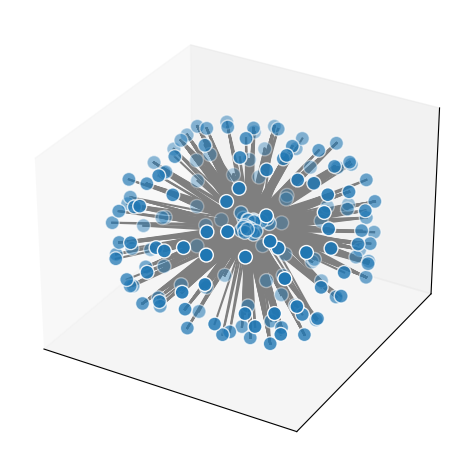

In [37]:
# nx.draw(G_BIS, nodelist= node_label, node_size=[v * .001 for v in node_weight]) 


from mpl_toolkits.mplot3d import Axes3D

# The graph to visualize
G = G_BIS

# 3d spring layout
pos = nx.spring_layout(G, dim=3, seed=779)
# Extract node and edge positions from the layout
node_xyz = np.array([pos[v] for v in sorted(G)])
edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

# Create the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
ax.scatter(*node_xyz.T, s=100, ec="w")

# Plot the edges
for vizedge in edge_xyz:
    ax.plot(*vizedge.T, color="tab:gray")


def _format_axes(ax):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    ax.grid(False)
    # Suppress tick labels
    for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
        dim.set_ticks([])
    # Set axes labels
    # ax.set_xlabel("x")
    # ax.set_ylabel("y")
    # ax.set_zlabel("z")


_format_axes(ax)
fig.tight_layout()
plt.show()

In [36]:
sum(dict(G_BIS.degree()).values())/len(dict(G_BIS.degree()).values())

15.648351648351648

In [144]:
# edge_labels = nx.get_edge_attributes(G_BIS, "Average_2021").values()
# print(edge_labels)
# sns.histplot(edge_labels)


In [38]:
print(nx.all_pairs_dijkstra_path(G_BIS))


<generator object all_pairs_dijkstra_path at 0x1411f99a0>


In [39]:
G_BIS.degree()
degrees = G_BIS.degree()
degree_values = [v for k, v in degrees]
print(sum(degree_values)/len(degrees))


15.648351648351648


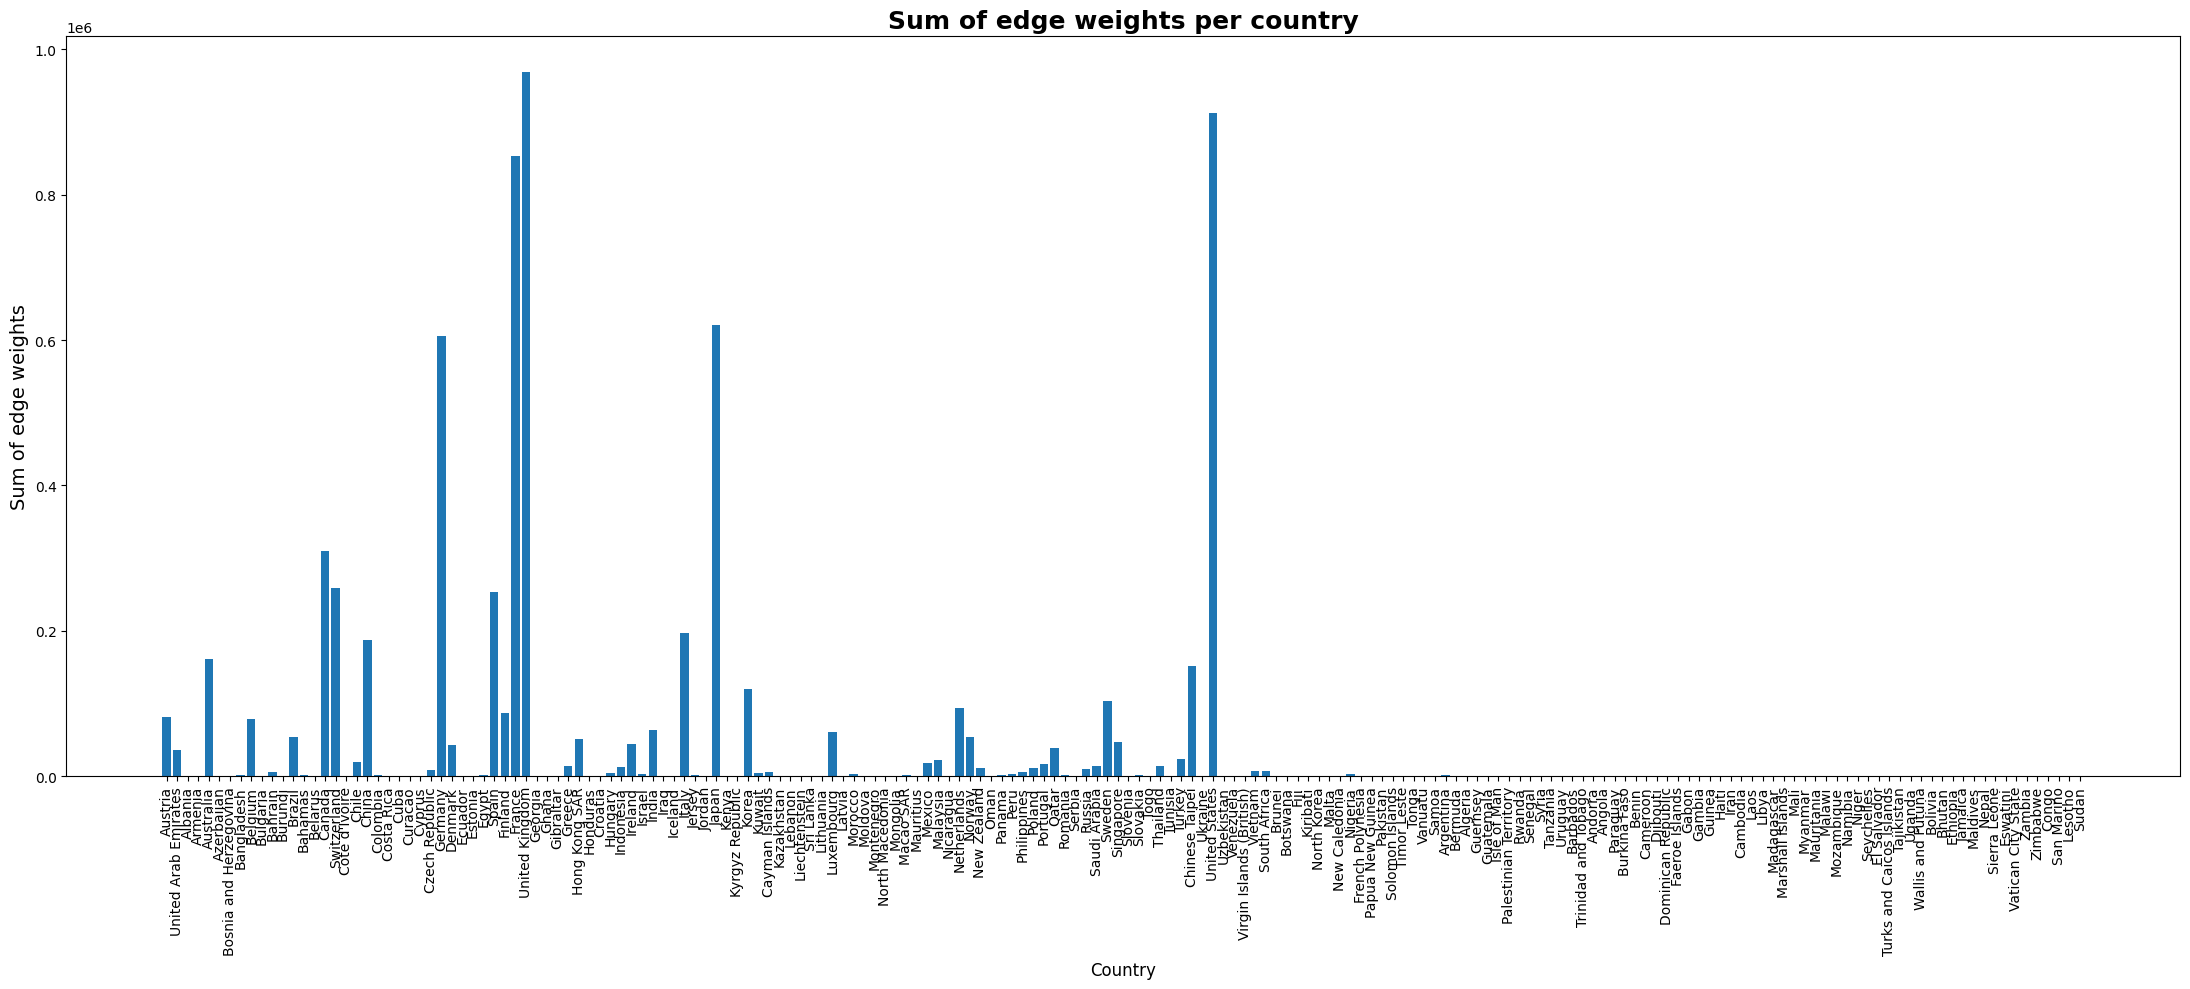

In [30]:
degrees = G_BIS.degree(weight='Average_2021')
node_weight=[ v for u,v in degrees]

node_size=[v * 100 for v in node_weight]

node_label=[ u for u,v in degrees]

plt.figure(figsize=(22,10))

plt.bar(node_label,node_weight)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Sum of edge weights',fontsize=14)
plt.title('Sum of edge weights per country', fontsize=18, weight='bold')
ax = plt.subplot()
ax.tick_params(axis='x', labelrotation=90)
# plt.hist(node_weight,node_label)
plt.tight_layout()
plt.show()

In [41]:
# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt
# import networkx as nx


NetworkX is a python package created by Aric Hagberg ,Pieter Swart ,Dan Schult. The package is an API that provides classes to instantiate graph objects , generators to create standard and random graphs, routines to read in datasets to graphdat structures, algorithms to analyse graphs and plotting tools to plot these graphs.

There are 4 main graph type classes:

Graph: \
This class implements an undirected graph. It ignores multiple edges between two nodes. It does allow self-loop edges between a node and itself.

DiGraph: \
Directed graphs, that is, graphs with directed edges. Provides operations common to directed graphs, (a subclass of Graph).

MultiGraph: \
A flexible graph class that allows multiple undirected edges between pairs of nodes. 
MultiDiGraph: \
A directed version of a MultiGraph.

## Network analysis

Hashable objects (strings, tuples, integers, and more) can be associated with nodes and edge attributes such as weights and labels can be associated with edges.

Empty graph-like objects are created with:

In [42]:
G = nx.Graph()
G = nx.DiGraph()
G = nx.MultiGraph()
G = nx.MultiDiGraph()

The graph internal data structures are based on an adjacency list representation and implemented using Python dictionary datastructures:

In [43]:
dictionary = {"name": 'Izhaan', "salary": 1234, "age": 23} 
print("\nDictionary with the use of string Keys: ") 
print(dictionary)


Dictionary with the use of string Keys: 
{'name': 'Izhaan', 'salary': 1234, 'age': 23}


The graph adjacency structure is implemented as a Python dictionary of dictionaries; the outer dictionary is keyed by nodes to values that are themselves dictionaries keyed by neighboring node to the edge attributes associated with that edge.




In [44]:
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('B', 'C')
print(G.adj)


{'A': {'B': {}}, 'B': {'A': {}, 'C': {}}, 'C': {'B': {}}}


The first choice to be made when using NetworkX is what type of graph object to use. A graph (network) is a collection of nodes together with a collection of edges that are pairs of nodes. Attributes are often associated with nodes and/or edges.

Two main property considerations of networks:\

Directed: Are the edges directed? Does the order of the edge pairs matter? A directed graph is specified by the “Di” prefix in the class name, e.g. DiGraph(). 

Multi-edges: Are multiple edges allowed between each pair of nodes? If so then use the prefix “Multi”, e.g., MultiGraph().

The next choice you have to make when specifying a graph is what kinds of nodes and edges to use.\

If the topology of the network is all you care about then using integers or strings as the nodes makes sense and you need not worry about edge data. If you have a data structure already in place to describe nodes you can simply use that structure as your nodes provided it is hashable.

Edges often have data associated with them. Arbitrary data can be associated with edges as an edge attribute. If the data is numeric and the intent is to represent a weighted graph then use the ‘weight’ keyword for the attribute.

### When there is decided how to encode the nodes and edges, and whether you have an undirected/directed graph with or without multiedges you are ready to build the network.


# Network creation

NetworkX graph objects can be created in one of three ways:

Graph generators—standard algorithms to create network topologies.

Importing data from pre-existing (usually file) sources.

Adding edges and nodes explicitly.

## Network Visualisation

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.ecdf(d)
fig.show()


Behoefte van research

In [ ]:
import os
import requests

def download_file(url, filename):
    ''' Downloads file from the url and save it as filename '''
    # check if file already exists
    if not os.path.isfile(filename):
        print('Downloading File')
        response = requests.get(url)
        # Check if the response is ok (200)
        if response.status_code == 200:
            # Open file and write the content
            with open(filename, 'wb') as file:
                # A chunk of 128 bytes
                for chunk in response:
                    file.write(chunk)
    else:
        print('File exists')

In [ ]:
url = 'https://github.com/holoviz/holoviews/blob/master/examples/assets/fb_nodes.csv'
filename = 'fb_nodes.csv'
download_file(url, filename)

File exists


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
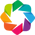

In [ ]:
import numpy as np
import pandas as pd
import holoviews as hv
import networkx as nx
from holoviews import opts

hv.extension('bokeh')

defaults = dict(width=400, height=400)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

In [ ]:
from pickle import TRUE


kwargs = dict(width=800, height=800, xaxis=None, yaxis=None)
opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))

colors = ['#000000']+hv.Cycle('Category20').values
edges_df = pd.read_csv('/Users/paul_reitz/opt/miniconda3/envs/py310/lib/python3.10/site-packages/holoviews/examples/assets/fb_edges.csv')
fb_nodes = hv.Nodes(pd.read_csv('/Users/paul_reitz/opt/miniconda3/envs/py310/lib/python3.10/site-packages/holoviews/examples/assets/fb_nodes.csv')).sort()

pos =nx.spring_layout(G_BIS, weight="Average_2021")
fb_graph = hv.Graph.from_networkx(G_BIS, pos).opts(tools=['hover'])

fb_graph.opts(cmap='blue', node_size=10, edge_line_width=0.3,
              node_line_color='gray', node_color='circle')

:Graph   [start,end]   (Average_2021)

In [ ]:
# https://holoviews.org/user_guide/Network_Graphs.html

In [ ]:
import requests
url = 'https://raw.githubusercontent.com/FBosler/Medium-Data-Extraction/master/sales_team.csv'
res = requests.get(url, allow_redirects=True)
with open('sales_team.csv','wb') as file:
    file.write(res.content)
sales_team = pd.read_csv('sales_team.csv')

In [ ]:
from pyvis.network import Network

import networkx as nx

In [ ]:
pageranks = nx.pagerank(G_BIS)

In [ ]:
print(pageranks)


{'AT:Austria': 0.006698396506740548, 'AE:United Arab Emirates': 0.0064218626891908845, 'AL:Albania': 0.004707909829832249, 'AM:Armenia': 0.004967811531462292, 'AU:Australia': 0.014315190223640863, 'AZ:Azerbaijan': 0.004606342768685832, 'BA:Bosnia and Herzegovina': 0.004662995193925183, 'BD:Bangladesh': 0.005165023417039664, 'BE:Belgium': 0.006749593372413293, 'BG:Bulgaria': 0.005507879970332172, 'BH:Bahrain': 0.005858288833309521, 'BI:Burundi': 0.004752084996292146, 'BR:Brazil': 0.00623044004125511, 'BS:Bahamas': 0.005684817001687348, 'BY:Belarus': 0.00491968738477672, 'CA:Canada': 0.007045059829940997, 'CH:Switzerland': 0.006808135432708225, "CI:Cote d'Ivoire": 0.004909609590131162, 'CL:Chile': 0.005775966086287522, 'CN:China': 0.00623044004125511, 'CO:Colombia': 0.005420224557434785, 'CR:Costa Rica': 0.005142951294654808, 'CU:Cuba': 0.004753227068318241, 'CW:Curacao': 0.004809189120808138, 'CY:Cyprus': 0.005362456620168767, 'CZ:Czech Republic': 0.006189461272910527, 'DE:Germany': 0.0

In [ ]:
print(sorted(pageranks, key=lambda x: x[1], reverse=True))

['AZ:Azerbaijan', 'CZ:Czech Republic', 'KZ:Kazakhstan', 'NZ:New Zealand', 'UZ:Uzbekistan', 'DZ:Algeria', 'TZ:Tanzania', 'MZ:Mozambique', 'SZ:Eswatini', 'BY:Belarus', 'CY:Cyprus', 'KY:Cayman Islands', 'MY:Malaysia', 'SY:Syria', 'UY:Uruguay', 'PY:Paraguay', 'LY:Libya', 'MX:Mexico', 'CW:Curacao', 'KW:Kuwait', 'TW:Chinese Taipei', 'BW:Botswana', 'RW:Rwanda', 'MW:Malawi', 'ZW:Zimbabwe', 'LV:Latvia', 'SV:El Salvador', 'MV:Maldives', 'AU:Australia', 'CU:Cuba', 'HU:Hungary', 'LU:Luxembourg', 'MU:Mauritius', 'RU:Russia', 'VU:Vanuatu', 'AT:Austria', 'IT:Italy', 'LT:Lithuania', 'PT:Portugal', 'MT:Malta', 'GT:Guatemala', 'TT:Trinidad and Tobago', 'HT:Haiti', 'BT:Bhutan', 'ET:Ethiopia', 'BS:Bahamas', 'ES:Spain', 'IS:Iceland', 'RS:Serbia', 'US:United States', 'WS:Samoa', 'PS:Palestinian Territory', 'LS:Lesotho', 'BR:Brazil', 'CR:Costa Rica', 'FR:France', 'GR:Greece', 'HR:Croatia', 'KR:Korea', 'TR:Turkey', 'AR:Argentina', 'IR:Iran', 'MR:Mauritania', 'IQ:Iraq', 'JP:Japan', 'KP:North Korea', 'NP:Nepal'

In [ ]:
# sort_by_key = dict(sorted(pageranks.items(),key=lambda item:item[0]))
from audioop import reverse


sort_by_value = dict(sorted(pageranks.items(), key=lambda item: item[1],reverse=True))
print(sum(sort_by_value.values()))

# print("sort_by_key:", sort_by_key)
print("sort_by_value:", sort_by_value)


0.9999999999999989
sort_by_value: {'GB:United Kingdom': 0.023308439801080518, 'FR:France': 0.015074417960226483, 'AU:Australia': 0.014315190223640863, 'IE:Ireland': 0.010711106296899376, 'DE:Germany': 0.007075840032978194, 'ES:Spain': 0.007075840032978194, 'US:United States': 0.0070587067981449205, 'CA:Canada': 0.007045059829940997, 'LU:Luxembourg': 0.00691887693107579, 'IT:Italy': 0.006856213429783111, 'CH:Switzerland': 0.006808135432708225, 'NL:Netherlands': 0.006808135432708225, 'BE:Belgium': 0.006749593372413293, 'SE:Sweden': 0.006745131812451743, 'JP:Japan': 0.006739120736398416, 'HK:Hong Kong SAR': 0.006700038397412548, 'SG:Singapore': 0.006700038397412548, 'AT:Austria': 0.006698396506740548, 'NO:Norway': 0.006669638068197858, 'ZA:South Africa': 0.006589296899044983, 'AE:United Arab Emirates': 0.0064218626891908845, 'DK:Denmark': 0.006418699466571531, 'KR:Korea': 0.0063937249685663035, 'PL:Poland': 0.006297379529074073, 'KY:Cayman Islands': 0.006291066191741958, 'PA:Panama': 0.00

In [15]:
import networkx as nx
from pyvis.network import Network
net= Network()

#For visualizing the graph
net.from_nx(G_BIS)
net.show_buttons(filter_=['physics'])
net.show_buttons(filter_=True)
net.show("graph.html")

The PageRank value of a node after k steps can be interpreted as the probability that a random walker lands on that node after taking k random steps. Random walk means we would start on a random node, and then we choose outgoing edges at random, and follow those edges to the next node. And then you’re going to repeat this k times. We simply randomly choose edges and walk along in the network and the value of PageRank of each node is the probability that you would land on that node after k steps. If you repeat this for a lot of steps, say k equals infinity. These are the values that you can eventually approach, these are the values that you converges to.

In [145]:

# value_key_pairs = ((value, key) for (key,value) in pageranks.items())
# sorted_value_key_pairs = sorted(value_key_pairs, reverse=True)
# sorted_value_key_pairs

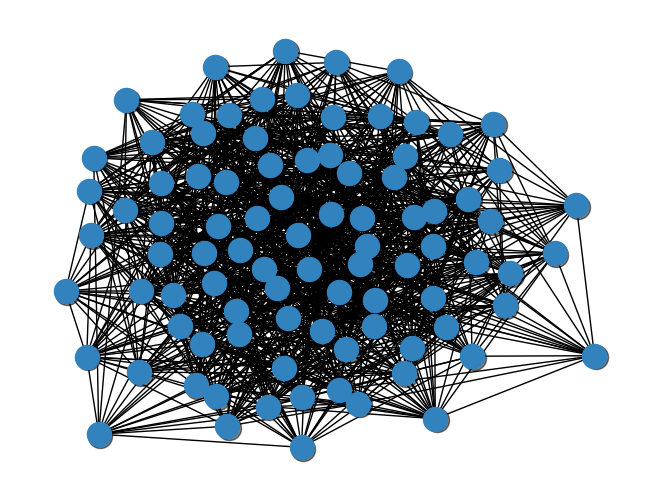

In [ ]:
import copy
import networkx
import matplotlib.pyplot as plt

# Generate a graph.
# Here I chose an ER graph.
g = nx.erdos_renyi_graph(90, 0.3)

# Get positions.
# Here I use the spectral layout and add a little bit of noise.
pos = nx.layout.spectral_layout(g)
pos = nx.spring_layout(g, pos=pos, iterations=50)

# Create position copies for shadows, and shift shadows
pos_shadow = copy.deepcopy(pos)
shift_amount = 0.006
for idx in pos_shadow:
    pos_shadow[idx][0] += shift_amount
    pos_shadow[idx][1] -= shift_amount

#~~~~~~~~~~~~
# Draw graph
#~~~~~~~~~~~~
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

nx.draw_networkx_nodes(g, pos_shadow, node_color='k', alpha=0.5)
nx.draw_networkx_nodes(g, pos, node_color="#3182bd", linewidths=1)
nx.draw_networkx_edges(g, pos, width=1)

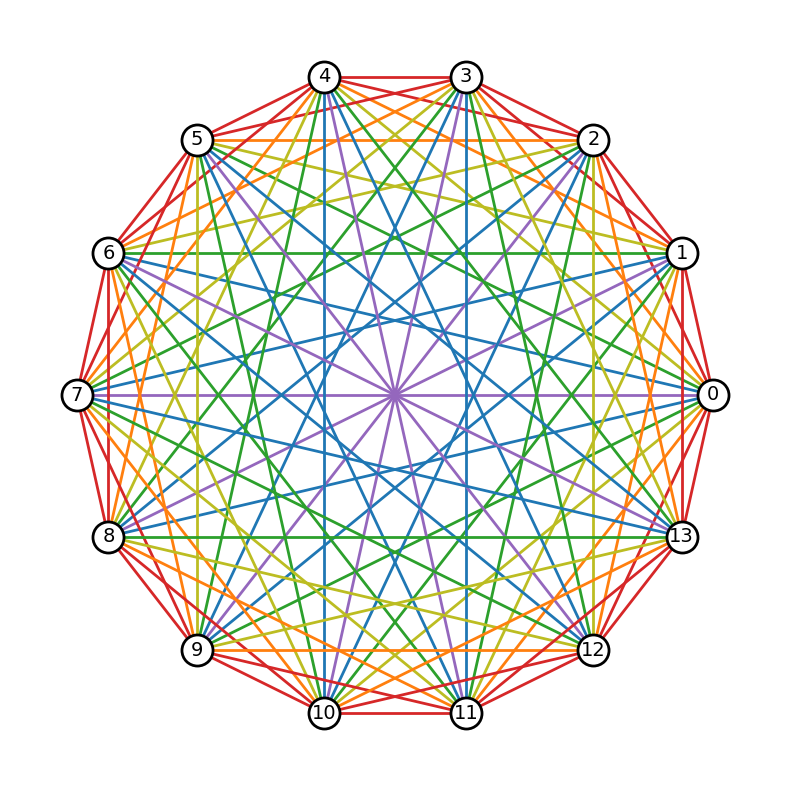

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# A rainbow color mapping using matplotlib's tableau colors
node_dist_to_color = {
    1: "tab:red",
    2: "tab:orange",
    3: "tab:olive",
    4: "tab:green",
    5: "tab:blue",
    6: "tab:purple",
}

# Create a complete graph with an odd number of nodes
nnodes = 14
G = nx.complete_graph(nnodes)

# A graph with (2n + 1) nodes requires n colors for the edges
n = (nnodes - 1) // 2
ndist_iter = list(range(1, n + 1))

# Take advantage of circular symmetry in determining node distances
ndist_iter += ndist_iter[::-1]


def cycle(nlist, n):
    return nlist[-n:] + nlist[:-n]


# Rotate nodes around the circle and assign colors for each edge based on
# node distance
nodes = list(G.nodes())
for i, nd in enumerate(ndist_iter):
    for u, v in zip(nodes, cycle(nodes, i + 1)):
        G[u][v]["color"] = node_dist_to_color[nd]

pos = nx.circular_layout(G)
# Create a figure with 1:1 aspect ratio to preserve the circle.
fig, ax = plt.subplots(figsize=(8, 8))
node_opts = {"node_size": 500, "node_color": "w", "edgecolors": "k", "linewidths": 2.0}
nx.draw_networkx_nodes(G, pos, **node_opts)
nx.draw_networkx_labels(G, pos, font_size=14)
# Extract color from edge data
edge_colors = [edgedata["color"] for _, _, edgedata in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=2.0, edge_color=edge_colors)

ax.set_axis_off()
fig.tight_layout()
plt.show()

In [ ]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

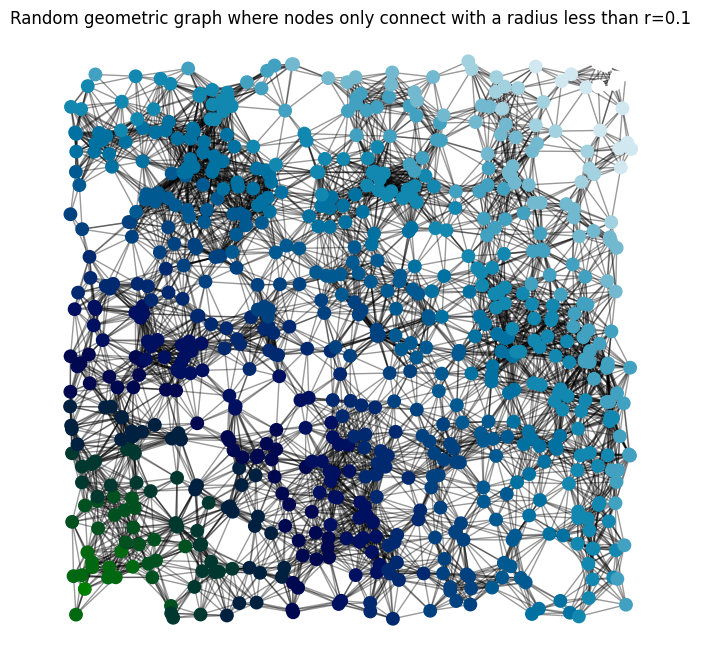

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Use seed when creating the graph for reproducibility
G = nx.random_geometric_graph(750, radius=0.1,p=2, seed=17307946)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, "pos")

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.ocean,
)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.title('Random geometric graph where nodes only connect with a radius less than r=0.1')
plt.show()

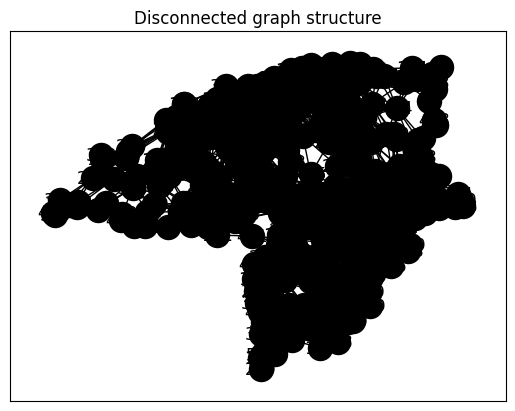

In [ ]:

plt.title('Disconnected graph structure')

nx.draw_networkx(G,node_color='black')

In mathematics, and more specifically in graph theory, a directed graph (or DiGraph) is a graph that is made up of a set of vertices connected by directed edges often called arcs. Edges here have directionality, which stands in contrast to undirected graphs where, semantically, edges have no notion of a direction to them. Directed acyclic graphs take this idea further; by being acyclic, they have no cycles in them. You will see this idea in action in the examples below.

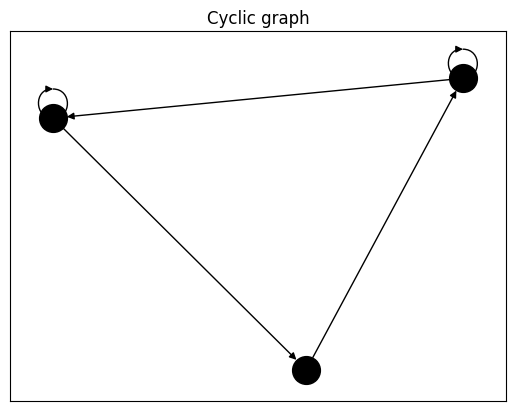

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([(0,1), (2,0), (1,1), (1,2),(2,2)])
plt.title('Cyclic graph')
nx.draw_networkx(G, node_color='black',node_size=400)

# then run dot -Tpng graph.dot > graph.png

True

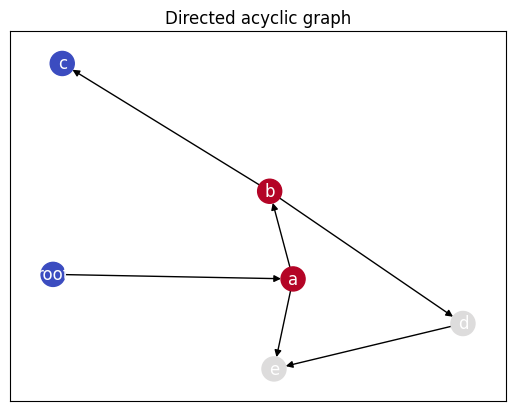

In [ ]:


import networkx as nx

import matplotlib
graph = nx.DiGraph()
graph.add_edges_from([("root", "a"), ("a", "b"), ("a", "e"), ("b", "c"), ("b", "d"), ("d", "e")])
plt.title('Directed acyclic graph')

d = dict(graph.degree)

low, *_, high = sorted(d.values())
norm = matplotlib.colors.Normalize(vmin=low, vmax=high, clip=True)

mapper=matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.coolwarm)


nx.draw_networkx(graph, node_color=[mapper.to_rgba(i) for i in d.values()],font_color='white')

nx.is_directed_acyclic_graph(graph)

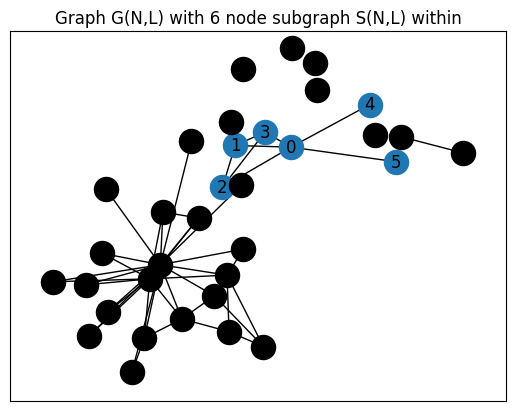

In [ ]:
import networkx as nx
from matplotlib import pylab as pl

G = nx.karate_club_graph()
res = [0,1,2,3,4,5, 'parrot'] #I've added 'parrot', a node that's not in G
                              #just to demonstrate that G.subgraph is okay
                              #with nodes not in G.    
pos = nx.spring_layout(G)  #setting the positions with respect to G, not k.
k = G.subgraph(res)  

pl.figure()
nx.draw_networkx(k, pos=pos)

othersubgraph = G.subgraph(range(6,G.order()))
nx.draw_networkx(othersubgraph, pos=pos, node_color = 'black')
pl.title('Graph G(N,L) with 6 node subgraph S(N,L) within')
pl.show()

In [7]:



from collections import Counter

In [8]:
import matplotlib.pylab as plt

In [25]:
# in_degrees = G_BIS.in_degree() # dictionary node:degree

# in_values = sorted(dict(in_degrees).values())
# in_hist = [Counter(dict(in_degrees).values())[x] for x in in_values]


out_degrees = G_BIS.degree() # dictionary node:degree

out_values = sorted(dict(out_degrees).values())
out_hist = [Counter(dict(out_degrees).values())[x] for x in out_values]

In [42]:
plt.figure() # you need to first do 'import pylab as plt'
plt.grid(True)
# plt.plot(in_values,in_hist,'ro-')
plt.bar(out_values, out_hist, color='cornflowerblue') # out-degree
# plt.legend(['In-degree', 'Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Scale-free degree distribution of world inter-bank liquidity network')
plt.xlim([0, 2*10**17])
plt.savefig('/Users/paul_reitz/Downloads/pngs/cam_net_degree_distribution.pdf')
plt.close()

In [59]:
def get_top_keys(dictionary, top):
 items =sorted(dictionary.keys(), key=lambda x: x[1]['score'])
 print(items)
#  return map(lambda x: x[0], items[:top])

In [60]:
bet_cen =nx.betweenness_centrality(G_BIS)
top_bet_cen = get_top_keys(bet_cen,10)

print(top_bet_cen)

TypeError: string indices must be integers

KeyError: 'pos'

ValueError: 'c' argument has 182 elements, which is inconsistent with 'x' and 'y' with size 50.

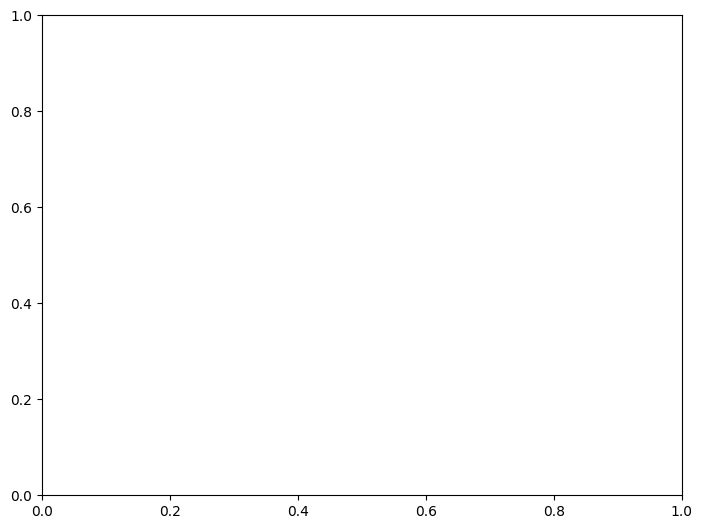

In [64]:
from networkx.generators import *
import numpy as np
import matplotlib.pyplot as plt

N_nodes=G_BIS.number_of_nodes()
G_BIS

#Computing centrality
degCent = nx.degree_centrality(G)

#Descending order sorting centrality
degCent_sorted=dict(sorted(degCent.items(), key=lambda item: item[1],reverse=True))

#Computing betweeness
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)

#Descending order sorting betweeness
betCent_sorted=dict(sorted(betCent.items(), key=lambda item: item[1],reverse=True))

#Color for regular nodes
color_list=N_nodes*['lightsteelblue']

#Getting indices on top 10 nodes for each measure
N_top=10
colors_top_10=['tab:orange','tab:blue','tab:green','lightsteelblue']
keys_deg_top=list(degCent_sorted)[0:N_top]
keys_bet_top=list(betCent_sorted)[0:N_top]

#Computing centrality and betweeness intersection
inter_list=list(set(keys_deg_top) & set(keys_bet_top))

#Setting up color for nodes
for i in inter_list:
  color_list[i]=colors_top_10[2]

for i in range(N_top):
  if keys_deg_top[i] not in inter_list:
    color_list[keys_deg_top[i]]=colors_top_10[0]
  if keys_bet_top[i] not in inter_list:
    color_list[keys_bet_top[i]]=colors_top_10[1]

#Draw graph
pos= nx.circular_layout(G)
nx.draw(G,pos,with_labels=True,node_color=color_list)

#Setting up legend
labels=['Top 10 deg cent','Top 10 bet cent','Top 10 deg and bet cent','no top 10']
for i in range(len(labels)):
  plt.scatter([],[],label=labels[i],color=colors_top_10[i])
plt.legend(loc='center')
plt.show()

In [73]:
%pip install nxvis

ERROR: Could not find a version that satisfies the requirement nxvis (from versions: none)
ERROR: No matching distribution found for nxvis


/Users/paul_reitz/opt/miniconda3/envs/py310/lib/python3.10/site-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


TypeError: BasePlot.draw() takes 0 positional arguments but 1 was given

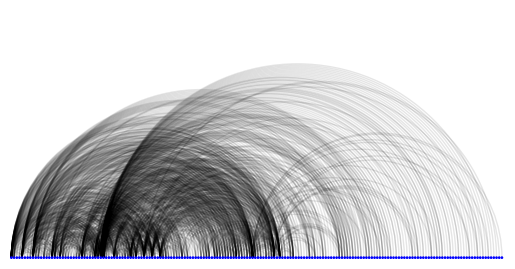

In [74]:
import nxviz as nv
import matplotlib.pyplot as plt
ap = nv.ArcPlot(G_BIS)
ap.draw()
plt.figure(figsize=(20,10))
plt.show()

/Users/paul_reitz/opt/miniconda3/envs/py310/lib/python3.10/site-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


TypeError: BasePlot.draw() takes 0 positional arguments but 1 was given

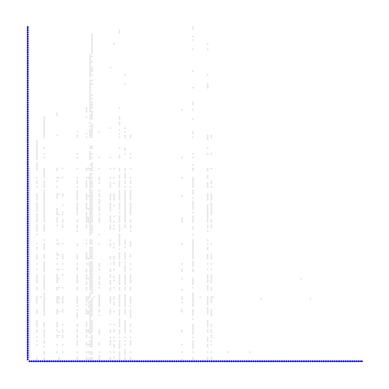

In [70]:
# Create the MatrixPlot object: m
m = nv.MatrixPlot(G_BIS)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

<AxesSubplot: ylabel='Count'>

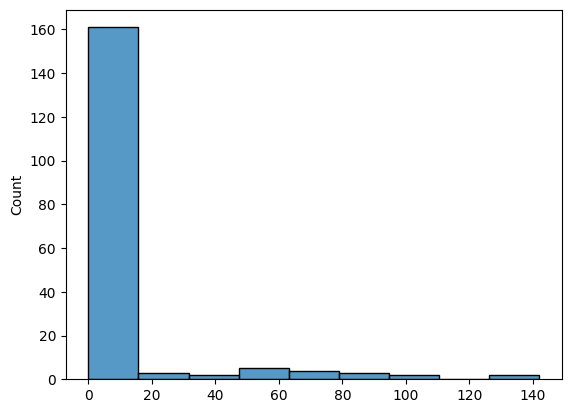

In [80]:
degrees = [len(list(G_BIS.neighbors(n))) for n in G_BIS.nodes()]
sns.histplot(degrees)

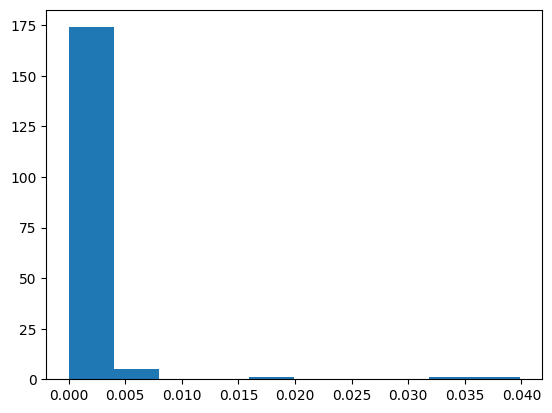

In [89]:
plt.hist(list(nx.betweenness_centrality(G_BIS).values()))
plt.show()

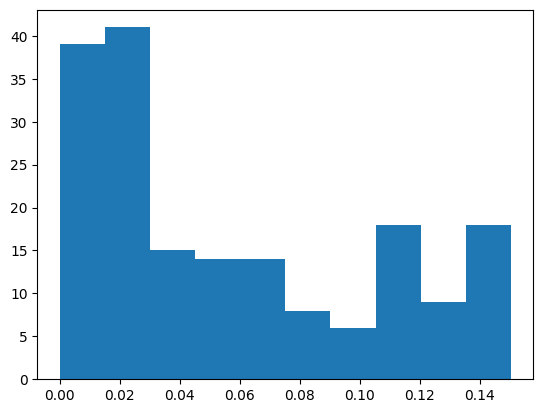

In [91]:
plt.hist(list(nx.eigenvector_centrality_numpy(G_BIS).values()))
plt.show()

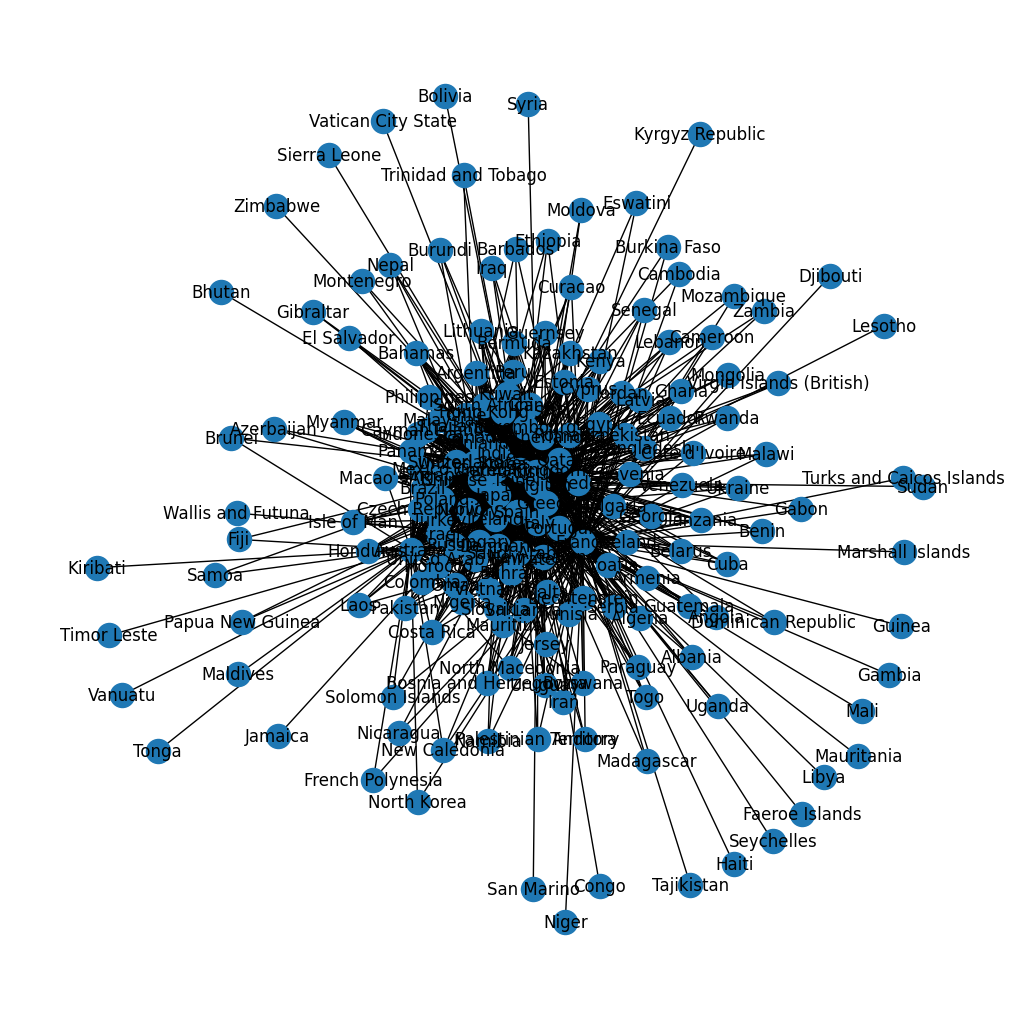

In [146]:

H = G_BIS.to_undirected()
subgraphs = [H.subgraph(c) for c in nx.connected_components(H)]

largest_ccs = sorted(subgraphs, key=lambda x: len(x))[-1]

plt.figure(figsize=(10, 10))
nx.draw(largest_ccs, with_labels=True)
plt.show()

<AxesSubplot: >

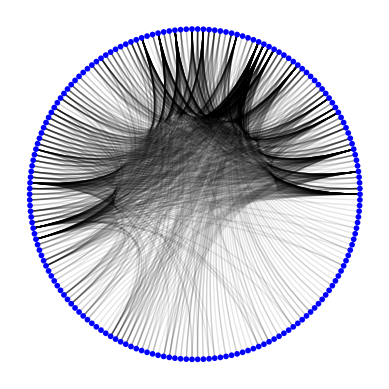

In [105]:
import nxviz as nv

nv.circos(G_BIS)

In [109]:
%pip install nams.functions

ERROR: Could not find a version that satisfies the requirement nams.functions (from versions: none)
ERROR: No matching distribution found for nams.functions
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

px.ecdf(dict(nx.degree(G_BIS)).values())


In [28]:
import nxviz as nv
from nxviz import annotate

for n, d in G_BIS.nodes(data=True):
    G_BIS.nodes[n]["degree"] = G_BIS.degree(n)

nv.circos(G_BIS, sort_by="degree", node_color_by="degree", node_size = 'dc',  node_enc_kwargs={"size_scale": 10})
annotate.node_colormapping(G_BIS, color_by="degree")

TypeError: base() got an unexpected keyword argument 'node_size'

In [2]:
from itertools import combinations

import networkx as nx
from nxviz import circos
from nams import *


def triangle_finding_strategies():
    """
    How to find triangles.
    """
    ans = """
One way would be to take one node, and look at its neighbors.
If its neighbors are also connected to one another,
then we have found a triangle.

Another way would be to start at a given node,
and walk out two nodes.
If the starting node is the neighbor of the node two hops away,
then the path we traced traces out the nodes in a triangle.
"""
    return render_html(ans)


def in_triangle(G, node):
    """
    Return whether a given node is present in a triangle relationship.
    """
    for nbr1, nbr2 in combinations(G.neighbors(node), 2):
        if G.has_edge(nbr1, nbr2):
            return True
    return False


def get_triangle_neighbors(G, node) -> set:
    """
    Return neighbors involved in triangle relationship with node.
    """
    neighbors1 = set(G.neighbors(node))
    triangle_nodes = set()
    for nbr1, nbr2 in combinations(neighbors1, 2):
        if G.has_edge(nbr1, nbr2):
            triangle_nodes.add(nbr1)
            triangle_nodes.add(nbr2)
    return triangle_nodes


def plot_triangle_relations(G, node):
    """
    Plot all triangle relationships for a given node.
    """
    triangle_nbrs = get_triangle_neighbors(G, node)
    triangle_nbrs.add(node)
    nx.draw(G.subgraph(triangle_nbrs), with_labels=True)


def triadic_closure_algorithm():
    """
    How to do triadic closure.
    """
    ans = """
I would suggest the following strategy:

1. Pick a node
1. For every pair of neighbors:
    1. If neighbors are not connected,
    then this is a potential triangle to close.

This strategy gives you potential triadic closures
given a "center" node `n`.

The other way is to trace out a path two degrees out
and ask whether the terminal node is a neighbor
of the starting node.
If not, then we have another triadic closure to make.
"""
    return render_html(ans)


def get_open_triangles_neighbors(G, node) -> set:
    """
    Return neighbors involved in open triangle relationships with a node.
    """
    open_triangle_nodes = set()
    neighbors = list(G.neighbors(node))

    for n1, n2 in combinations(neighbors, 2):
        if not G.has_edge(n1, n2):
            open_triangle_nodes.add(n1)
            open_triangle_nodes.add(n2)

    return open_triangle_nodes


def plot_open_triangle_relations(G, node):
    """
    Plot open triangle relationships for a given node.
    """
    open_triangle_nbrs = get_open_triangles_neighbors(G, node)
    open_triangle_nbrs.add(node)
    nx.draw(G.subgraph(open_triangle_nbrs), with_labels=True)


def simplest_clique():
    """
    Answer to "what is the simplest clique".
    """
    return render_html("The simplest clique is an edge.")


def size_k_maximal_cliques(G, k):
    """
    Return all size-k maximal cliques.
    """
    for clique in nx.find_cliques(G):
        if len(clique) == k:
            yield clique


def find_k_cliques(G, k):
    """
    Find all cliques of size k.
    """
    for clique in nx.find_cliques(G):
        if len(clique) >= k:
            for nodeset in combinations(clique, k):
                yield nodeset


def visual_insights():
    """
    Answer to visual insights exercise.
    """
    ans = """
We might hypothesize that there are 3,
maybe 4 different "communities" of nodes
that are completely disjoint with one another,
i.e. there is no path between them.
"""
    print(ans)


def label_connected_component_subgraphs(G):
    """Label all connected component subgraphs."""
    G = G.copy()
    for i, nodeset in enumerate(nx.connected_components(G)):
        for n in nodeset:
            G.nodes[n]["subgraph"] = i
    return G


def plot_cc_subgraph(G):
    """Plot all connected component subgraphs."""
    c = circos(G, node_color_by="subgraph", group_by="subgraph")

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (chirality.py, line 224)

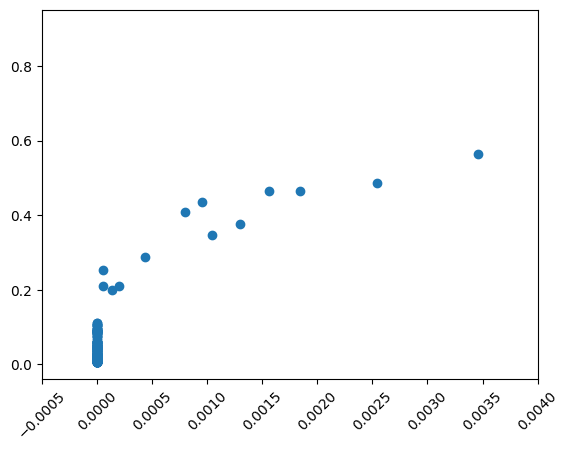

In [87]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(G_BIS)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(G_BIS)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

# Display the plot
plt.xlim(-0.00050, 0.0040)
plt.xticks(rotation=45)
plt.show()

In [29]:
import scipy.stats as st

In [ ]:
from ipywidgets import interact, IntSlider

m = IntSlider(value=2, min=1, max=10)

@interact(m=m)
def compare_barabasi_albert_graph(m):
    fig, ax = plt.subplots()
    G_ba = nx.barabasi_albert_graph(n=len(G.nodes()), m=m)
    x, y = ecdf(pd.Series(dict(nx.degree(G_ba))))
    ax.scatter(x, y, label="Barabasi-Albert Graph")

    x, y = ecdf(pd.Series(dict(nx.degree(G))))
    ax.scatter(x, y, label="Protein Interaction Network")
    ax.legend()

In [6]:
from ipywidgets import FloatSlider
p = FloatSlider(value=0.6, min=0, max=0.1, step=0.001)

@interact(p=p)
def compare_erdos_renyi_graph(p):
    fig, ax = plt.subplots()
    G_er = nx.erdos_renyi_graph(n=len(G.nodes()), p=p)
    x, y = ecdf(pd.Series(dict(nx.degree(G_er))))
    ax.scatter(x, y, label="Erdos-Renyi Graph")

    x, y = ecdf(pd.Series(dict(nx.degree(G))))
    ax.scatter(x, y, label="Banking Network")
    ax.legend()
    ax.set_title(f"p={p}")

ModuleNotFoundError: No module named 'ipywidgets'

In [7]:
from scipy.stats import wasserstein_distance

def erdos_renyi_degdist(n, p):
    """Return a Pandas series of degree distribution of an Erdos-Renyi graph."""
    G = nx.erdos_renyi_graph(n=n, p=p)
    return pd.Series(dict(nx.degree(G)))

def barabasi_albert_degdist(n, m):
    """Return a Pandas series of degree distribution of an Barabasi-Albert graph."""
    G = nx.barabasi_albert_graph(n=n, m=m)
    return pd.Series(dict(nx.degree(G)))

deg = pd.Series(dict(nx.degree(G_BIS)))

er_deg = erdos_renyi_degdist(n=len(G_BIS.nodes()), p=0.001)
ba_deg = barabasi_albert_degdist(n=len(G_BIS.nodes()), m=1)
wasserstein_distance(deg, er_deg), wasserstein_distance(deg, ba_deg)

(15.46153846153846, 13.659340659340659)

In [169]:
from tqdm.autonotebook import tqdm
er_dist = []
ba_dist = []
wz_dist = []

for _ in tqdm(range(150)):
    er_deg = erdos_renyi_degdist(n=len(G_BIS.nodes()), p=0.08645498148260579)
    er_dist.append(wasserstein_distance(deg, er_deg))

    wz_deg=nx.watts_strogatz_graph(n=len(G_BIS.nodes()), k=16, p=0.08645498148260579)
    wz_dist.append(wasserstein_distance(deg, wz_deg))


    ba_deg = barabasi_albert_degdist(n=len(G_BIS.nodes()), m=11)
    ba_dist.append(wasserstein_distance(deg, ba_deg))

100%|██████████| 150/150 [00:00<00:00, 202.34it/s]


Text(64.0, 0.5, 'Wasserstein distance')

/Users/paul_reitz/opt/miniconda3/envs/py310/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


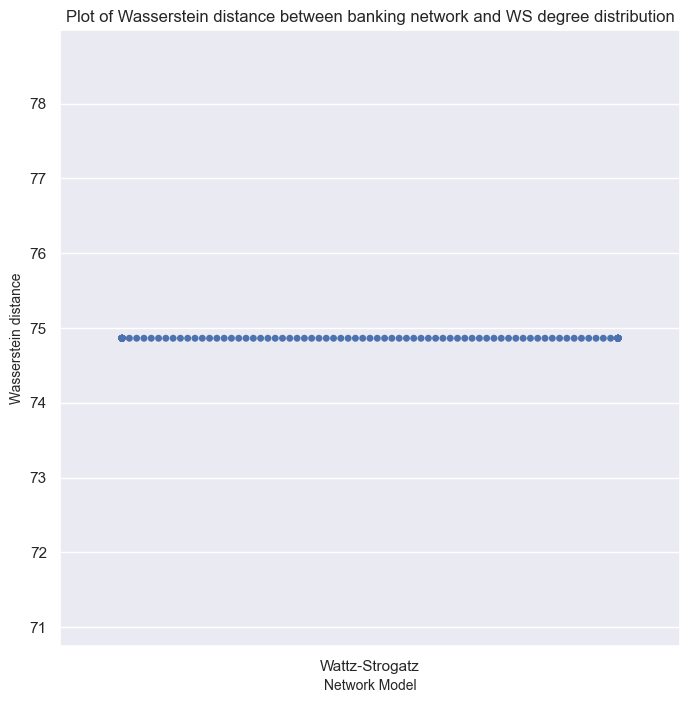

In [171]:
import seaborn as sns
# import janitor


data = (
    pd.DataFrame(
        {
            # "Erdos-Renyi": er_dist,
            # "Barabasi-Albert": ba_dist,
            "Wattz-Strogatz" : wz_dist,
            
            
        }
    )
)
sns.set(rc = {'figure.figsize':(8,8)})
pl=sns.swarmplot(data=data)
pl.set(title='Plot of Wasserstein distance between banking network and WS degree distribution')
pl.set_xlabel("Network Model", fontsize = 10)
pl.set_ylabel("Wasserstein distance", fontsize = 10)